In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import tensorflow as tf
import time

In [2]:
train = pd.read_csv('../data/train.csv')
train['ImageId'] = train['ImageId_ClassId'].str[:-2]
train['ClassId'] = train['ImageId_ClassId'].str[-1:]
train = train[['ImageId','ClassId','EncodedPixels']]
train[['ImageId','ClassId']].head(12)

,ImageId,ClassId
0,0002cc93b.jpg,1
1,0002cc93b.jpg,2
2,0002cc93b.jpg,3
3,0002cc93b.jpg,4
4,00031f466.jpg,1
5,00031f466.jpg,2
6,00031f466.jpg,3
7,00031f466.jpg,4
8,000418bfc.jpg,1
9,000418bfc.jpg,2


In [3]:
train = train.fillna(0)
filelist = os.listdir("../data/train_images/")
print("Train set contains: ",len(filelist),"images")
train_img = []
counter = 0
labels = []
for i in filelist:
    x = train[train["ImageId"] == i]
    if len(x[x["EncodedPixels"] == 0]) == 4:
        pass
    else:
        train_img.append(i)
        counter += 1
        temp= x.ClassId[x["EncodedPixels"] != 0].values
        labels.append(int(temp[0]))

Train set contains:  12568 images


In [4]:
print(len(labels))
print(len(train_img))

6666
6666


In [5]:
labels[:10]

[1, 3, 1, 4, 3, 3, 4, 1, 4, 3]

In [6]:
data_set = list(zip(train_img,labels))

In [7]:
train_set = pd.DataFrame(data_set)
train_set.head()

,0,1
0,0002cc93b.jpg,1
1,0007a71bf.jpg,3
2,000a4bcdd.jpg,1
3,000f6bf48.jpg,4
4,0014fce06.jpg,3


In [9]:
train_set.columns = ['ImageId', "label"]

In [15]:
abs_path = "../data/train_images/"

In [48]:
img_names = train_set.ImageId[:4].values
img_names

array(['0002cc93b.jpg', '0007a71bf.jpg', '000a4bcdd.jpg', '000f6bf48.jpg'],
      dtype=object)

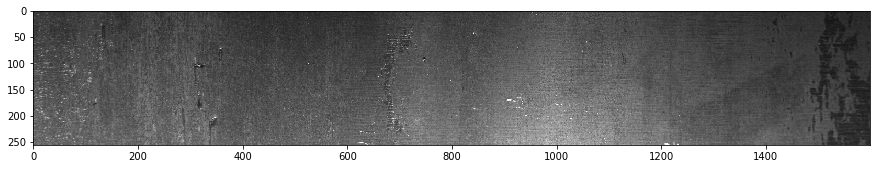

In [18]:
seed_image = cv2.imread(abs_path+img_names[0])
seed_image = cv2.cvtColor(seed_image, cv2.COLOR_BGR2GRAY)
seed_image_resize = cv2.resize(seed_image, dsize=(1600, 256))
plt.figure(figsize=(15,15))
plt.imshow(seed_image_resize, "gray")

In [25]:
df_exact = train[train["ImageId"] == img_names[0]]
df_exact2 = df_exact[df_exact["EncodedPixels"] != 0]

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...


In [45]:
def get_segment(img_name):
    segment_4 = []
    for i in range(4):
        x = train[train["ImageId"] == img_name]
        x2 = x[x["ClassId"] == str(i+1)]
        x3 = x2["EncodedPixels"].values[0]

        if x3 ==0:
            x4 = "ok"

        else:
            x4 = x3.split()
        segment_4.append(x4)
    segment_4 = np.array(segment_4)
    seg_img = np.ones([seed_image.shape[0], seed_image.shape[1],5], dtype=np.uint8)
    for j in range(4):

        seg_np = np.ones([seed_image.shape[0]*seed_image.shape[1]], dtype=np.uint8)

        if segment_4[j]=="ok":
            pass

        else:
            for i in range(len(segment_4[j])//2):
                start = int(segment_4[j][2*i])
                length = int(segment_4[j][2*i+1])
                seg_np[start:start+length]=0

        seg_img[:,:,j+1] = seg_np.reshape([seed_image.shape[1],seed_image.shape[0]]).T
    seg_img[:,:,0] = seg_img[:,:,0]*4 - seg_img[:,:,1] - seg_img[:,:,2] - seg_img[:,:,3] - seg_img[:,:,4]
    return seg_img

In [51]:
img_segmnts = []
for img in img_names:
    img_segmnts.append(get_segment(img))

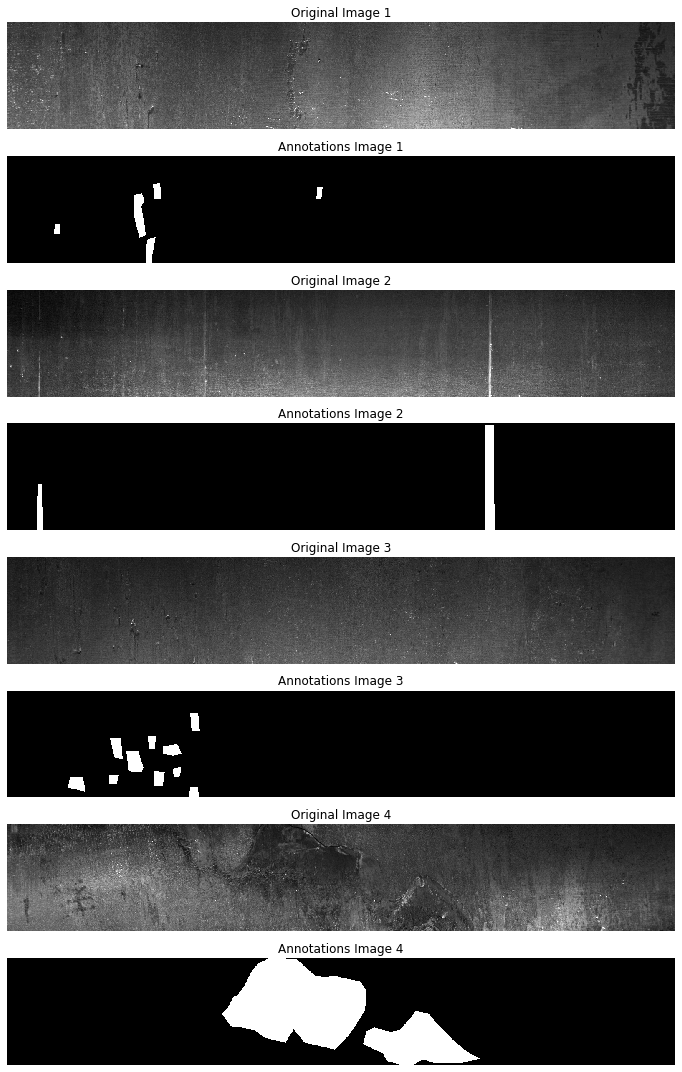

In [62]:
plt.figure(figsize=(15,15))

plt.subplot(8,1,1)
seed_image = cv2.imread(abs_path+img_names[0])
seed_image = cv2.cvtColor(seed_image, cv2.COLOR_BGR2GRAY)
seed_image_resize = cv2.resize(seed_image, dsize=(1600, 256))
plt.imshow(seed_image_resize, "gray")
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(8,1,2)
plt.imshow(img_segmnts[0][:,:,0],"gray",vmin=0,vmax=1)
plt.title('Annotations Image 1')
plt.axis('off')

plt.subplot(8,1,3)
seed_image = cv2.imread(abs_path+img_names[1])
seed_image = cv2.cvtColor(seed_image, cv2.COLOR_BGR2GRAY)
seed_image_resize = cv2.resize(seed_image, dsize=(1600, 256))
plt.imshow(seed_image_resize, "gray")
plt.title('Original Image 2')
plt.axis('off')

plt.subplot(8,1,4)
plt.imshow(img_segmnts[1][:,:,0],"gray",vmin=0,vmax=1)
plt.title('Annotations Image 2')
plt.axis('off')

plt.subplot(8,1,5)
seed_image = cv2.imread(abs_path+img_names[2])
seed_image = cv2.cvtColor(seed_image, cv2.COLOR_BGR2GRAY)
seed_image_resize = cv2.resize(seed_image, dsize=(1600, 256))
plt.imshow(seed_image_resize, "gray")
plt.title('Original Image 3')
plt.axis('off')

plt.subplot(8,1,6)
plt.imshow(img_segmnts[2][:,:,0],"gray",vmin=0,vmax=1)
plt.title('Annotations Image 3')
plt.axis('off')

plt.subplot(8,1,7)
seed_image = cv2.imread(abs_path+img_names[3])
seed_image = cv2.cvtColor(seed_image, cv2.COLOR_BGR2GRAY)
seed_image_resize = cv2.resize(seed_image, dsize=(1600, 256))
plt.imshow(seed_image_resize, "gray")
plt.title('Original Image 4')
plt.axis('off')

plt.subplot(8,1,8)
plt.imshow(img_segmnts[3][:,:,0],"gray",vmin=0,vmax=1)
plt.title('Annotations Image 4')
plt.axis('off')

plt.tight_layout()
plt.savefig("ExampleData.png")